# Combining Datasets with Pandas' `concat`, `merge`, and `join` 

### Useful resource - https://pandas.pydata.org/docs/user_guide/merging.html


#### Link to Data - https://github.com/dev7saxena/LIS875/tree/main/Week%204%20-%20Merging%20Datasets/Data

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", 50)
import numpy as np
from google.colab import files

uploaded = files.upload()

Saving climate_temp.csv to climate_temp.csv
Saving climate_precip.csv to climate_precip.csv


# TWO KEY CONCEPTS: INNER AND OUTER JOIN 

### **Inner Join** (intersection): Only keep columns that are common to both datasets
### **Outer Join** (union): Keep all columns from both datasets

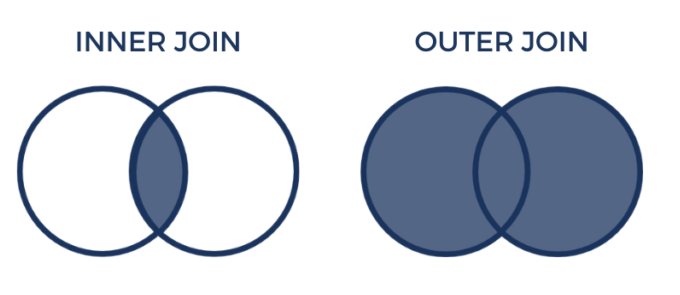

In [ ]:
#CREATE THREE DATAFRAMES
df1 = pd.DataFrame.from_dict({'col1': [1,2,3], 'col2': ['a','b','c'], 'col3': ['a1','b2','c3']})
df2 = pd.DataFrame.from_dict({'col1': [4,5,6], 'col2': ['d','e','f'], 'col3': ['d4','e5','f6']})
df3 = pd.DataFrame.from_dict({'col1': [7,8,9], 'col2': ['g','h','i'], 'col4': ['g7','h2','i3']})

In [ ]:
#PRINT DATAFRAMES
print('Here is df1:')
print(df1)
print('\nHere is df2:')
print(df2)
print('\nHere is df3:')
print(df3)

Here is df1:
   col1 col2 col3
0     1    a   a1
1     2    b   b2
2     3    c   c3

Here is df2:
   col1 col2 col3
0     4    d   d4
1     5    e   e5
2     6    f   f6

Here is df3:
   col1 col2 col4
0     7    g   g7
1     8    h   h2
2     9    i   i3


### Let's combine df1 and df2 (they have the same columns)

In [ ]:
#df_concat
df_concat = pd.concat([df1, df2])
print(df_concat)

   col1 col2 col3
0     1    a   a1
1     2    b   b2
2     3    c   c3
0     4    d   d4
1     5    e   e5
2     6    f   f6


### Original indices from df1 and df2 were preserved. Lets use `ignore_index` parameter to reset index in the new dataframe

In [ ]:
#ignore index
df_concat = pd.concat([df1, df2], ignore_index=True)
print(df_concat)

   col1 col2 col3
0     1    a   a1
1     2    b   b2
2     3    c   c3
3     4    d   d4
4     5    e   e5
5     6    f   f6


### Now let's combine df1 and df3 (they have different columns)

In [ ]:
#combine df1 and df3
df_concat = pd.concat([df1, df3], ignore_index=True)
print(df_concat)

   col1 col2 col3 col4
0     1    a   a1  NaN
1     2    b   b2  NaN
2     3    c   c3  NaN
3     7    g  NaN   g7
4     8    h  NaN   h2
5     9    i  NaN   i3


### Concat, by default uses an `outer` join approach that preserves values across all columns and adds missing values (`NaN`). Let's try to do an **inner** join.

In [ ]:
#inner join
df_concat = pd.concat([df1, df3], ignore_index=True, join='inner')
print(df_concat)

   col1 col2
0     1    a
1     2    b
2     3    c
3     7    g
4     8    h
5     9    i


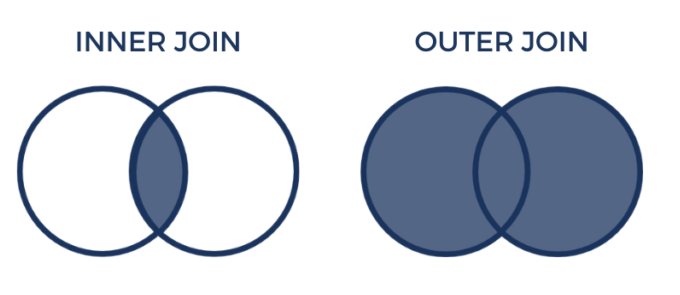

## Concatenating Multiple Dataframes

In [ ]:
#concat df1, df2, df3 
#DEFAULT: Outer Join
df_concat = pd.concat([df1, df2, df3], ignore_index=True)
print(df_concat)

In [ ]:
#concat df1, df2, df3
#Specifying an 'Inner' Join
df_concat = pd.concat([df1, df2, df3], ignore_index=True, join='inner')
print(df_concat)

   col1 col2
0     1    a
1     2    b
2     3    c
3     4    d
4     5    e
5     6    f
6     7    g
7     8    h
8     9    i


## Importing Data

Calling `.head()` on the dataFrame will give you top 5 rows as a quick preview of the data. `.tail()` gives you the bottom 5 rows. `shape` gives you dimensions of the dataframe in the form `(rows, columns)`.

In [ ]:
#read csv
climate_temp = pd.read_csv("climate_temp.csv")

climate_temp.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,-7777,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,-7777,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,-7777,0,0,0,-7777,-7777,2,5,7,10,15


In [ ]:
#shape
climate_temp.shape


(127020, 21)

In [ ]:
#read precipitation csv
climate_precip = pd.read_csv("climate_precip.csv")
climate_precip.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.02,0.0,0.02,0.0,98,43,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.04,0.0,0.04,0.0,99,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666,-66.6,0.05,0.0,0.05,0.0,100,44,12,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.07,0.0,0.07,0.0,101,45,12,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,0.09,0.0,0.09,0.0,102,45,12,3,0,0,0,0,0,0,0,0,0


In [ ]:
#shape
climate_precip.shape

(151110, 29)

## concat()

First, you will see a basic concatenation

In [ ]:
#read in station 1
precip_station_1 = climate_precip.query("STATION == 'GHCND:USC00045721'")
precip_station_1.head()

In [ ]:
#read in station 2
precip_station_2 = climate_precip.query("STATION =='GHCND:USC00049099'")

## CLASS EXERCISE: 10 Minutes

### Write a function that concatenates `precip_station_1` and `precip_station_1` dataframes
### Parameters: It takes in two dataframes as input parameters
### Returns: merged dataframe, shape of merged dataframe, and summary statistics of the dataframe


In [ ]:
def concat_dfs(df1, df2):
  df_concat = pd.concat([df1, df2], ignore_index=True)
  shape = df_concat.shape
  summary = df_concat.describe()

  return df_concat, shape, summary

In [ ]:
combined_df, df_shape, df_summary = concat_dfs(precip_station_1, precip_station_2)

In [ ]:
combined_df.head()

In [ ]:
print(df_shape, precip_station_1.shape, precip_station_2.shape)

(730, 29) (365, 29) (365, 29)


In [ ]:
df_summary

## Now let's concatenate the precipitation dataset and the temperature dataset

In [ ]:
#outer join
print(climate_temp.shape, climate_precip.shape)

(127020, 21) (151110, 29)


In [ ]:
outer_joined = pd.concat([climate_temp, climate_precip])

In [ ]:
#shape
outer_joined.shape

(278130, 47)

In [ ]:
#inner join
inner_joined = pd.concat([climate_temp, climate_precip], join="inner")
inner_joined.head()

,STATION,STATION_NAME,DATE
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105


In [ ]:
#shape
inner_joined.shape

(278130, 3)

# **Merging datasets with** `merge()`

## By default, Pandas uses an `inner` join to merge data

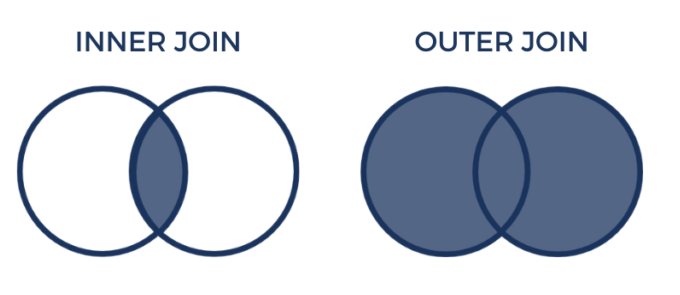

In [ ]:
#create dataframes

books = pd.DataFrame.from_dict({
    'Author ID': [1,1,2,3],
    'Book ID': [1,2,1,1],
    'Name': ['Dune', 'Harry Potter', 'Game of Thrones', 'Lord of the Rings']
})

authors = pd.DataFrame.from_dict({
    'Author ID': [1,2,3,4],
    'Name': ['Jamie', 'Alex', 'Jane', 'Matt']
})

sales = pd.DataFrame.from_dict({
    'Author ID': [1,1,1,2,3,4],
    'Book ID': [1,2,1,1,1,1],
    'Sales': [10, 20, 10, 30, 45,10]
})

In [ ]:
#print dataframes
print("Books dataframe:")
print(books)
print("\nAuthors dataframe:")
print(authors)
print("\nSales dataframe")
print(sales)

Books dataframe:
   Author ID  Book ID               Name
0          1        1               Dune
1          1        2       Harry Potter
2          2        1    Game of Thrones
3          3        1  Lord of the Rings

Authors dataframe:
   Author ID   Name
0          1  Jamie
1          2   Alex
2          3   Jane
3          4   Matt

Sales dataframe
   Author ID  Book ID  Sales
0          1        1     10
1          1        2     20
2          1        1     10
3          2        1     30
4          3        1     45
5          4        1     10


## Let's merge `Books` and `Authors` so we can get authors' names in one dataframe

In [ ]:
#merge books and authors
merged_df = pd.merge(left=books, right=authors, left_on='Author ID', right_on='Author ID')
print(merged_df)

   Author ID  Book ID             Name_x Name_y
0          1        1               Dune  Jamie
1          1        2       Harry Potter  Jamie
2          2        1    Game of Thrones   Alex
3          3        1  Lord of the Rings   Jane


##By default, Pandas uses an `inner` merge, that is why author `Matt` was dropped.

### Now let's try an outer join

In [ ]:
#outer join
merged_df2 = pd.merge(left=books, right=authors, left_on='Author ID', right_on='Author ID', how="outer")
print(merged_df2)

   Author ID  Book ID             Name_x Name_y
0          1      1.0               Dune  Jamie
1          1      2.0       Harry Potter  Jamie
2          2      1.0    Game of Thrones   Alex
3          3      1.0  Lord of the Rings   Jane
4          4      NaN                NaN   Matt


## Sometimes, it is helpful to know which columns came from which dataframes in a more informative way. We can use the `suffixes` parameter for that

In [ ]:
#add suffixes
merged_df2 = pd.merge(left=books, right=authors, left_on='Author ID', right_on='Author ID', how="outer", suffixes=('(book)','(author)'))
print(merged_df2)

   Author ID  Book ID         Name(book) Name(author)
0          1      1.0               Dune        Jamie
1          1      2.0       Harry Potter        Jamie
2          2      1.0    Game of Thrones         Alex
3          3      1.0  Lord of the Rings         Jane
4          4      NaN                NaN         Matt


## Merging on multiple columns

In [ ]:
#merged_multi_cols
merge_multi_cols = pd.merge(left=books, right=sales, on=['Author ID', 'Book ID'])

print(merge_multi_cols)

   Author ID  Book ID               Name  Sales
0          1        1               Dune     10
1          1        1               Dune     10
2          1        2       Harry Potter     20
3          2        1    Game of Thrones     30
4          3        1  Lord of the Rings     45


## **LEFT** join and **RIGHT** join

### **Left join**: Take all records from the `left` dataframe and only include matching records from the `right` dataframe

### **Right join**: Take all records from the `right` dataframe and only include matching records from the `left` dataframe

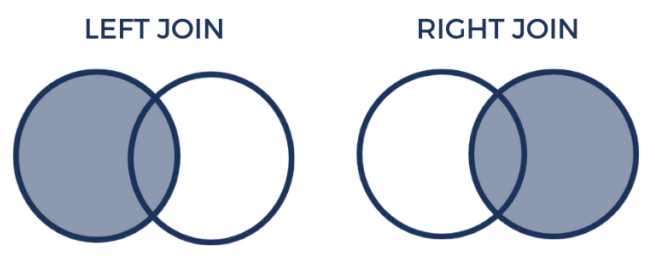

## `join()` method is called on one dataframe and is used to **join** another

In [ ]:
#can also use join for a quick merge

### Inner Join

Here, you will use a plain `merge()` call to do an inner join and learn how this can result in a smaller, more focused dataset. First, you will create a new DataFrame object that contains the precipitation data from one station.

In [ ]:
#read in precip_station_1
#look at shape

# CLASS EXERCISE (10 Minutes)

### Write a function that merges `precip_station_1` and `climate_temp` dataframes
### Parameters: It takes in two dataframes as input parameters
### Returns: merged dataframe and `True` if the length of precip_station_1 is equal to the merged dataframe

In [ ]:
def merge_dataframes (df1, df2):

  merged_df = pd.merge(df1, df2)
  bool = False
  if(len(merged_df == len(df1))):
    bool = True

  return merged_df, bool

In [ ]:
merged_data, condition = merge_dataframes(precip_station_1, climate_temp)

In [ ]:
print(merged_data.shape, precip_station_1.shape, climate_temp.shape)

(365, 47) (365, 29) (127020, 21)


You get 365 rows because any non-matching rows are discarded in an inner join, which is the default merge method for a `merge()` call, and `precip_one_station` had only 365 rows.

What if you want to merge both full datasets, but specify which columns to join on? In this case, you will use the `on` parameter:

In [ ]:
inner_merged_total = pd.merge(climate_temp, climate_precip, on=["STATION", "DATE"])
inner_merged_total.head()

In [ ]:
inner_merged_total.shape

You can specify a single _key column_ with a string, or multiple key columns with a list, as in the above example. This results in a DataFrame with 123005 rows and 48 columns. 

### Outer Join
With the outer join, you will retain rows that don't have matches as well. For this example, you will use the smaller precipitation DataFrame `precip_one_station` with the full `climate_temp` DataFrame and join with `STATION` and `DATE` columns as the key columns. Take a second and think about how many rows you expect the new DataFrame to have.

In [ ]:
outer_merged = pd.merge(precip_station_1, climate_temp, how="outer", on=["STATION", "DATE"])

outer_merged.head()

In [ ]:
outer_merged.shape

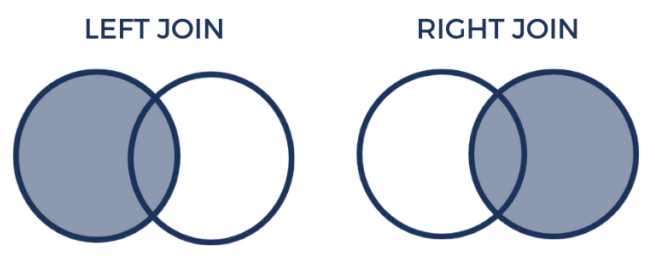

### Left Join
Also known as a left outer join. In this join, you will retain rows that don't have matches only on the left (or first) DataFrame to be merged.

In [ ]:
#merge on left
left_merged = pd.merge(climate_temp, precip_station_1, how="left", on=["STATION", "DATE"])

left_merged.head()

In [ ]:
#get shape 
left_merged.shape

In [ ]:
#switch positions
left_merged_reversed = pd.merge(
    precip_station_1, climate_temp, how="left", on=["STATION", "DATE"]
)
left_merged_reversed.head()

In [ ]:
left_merged_reversed.shape

### Right Join
This works the same as the left join, however non-matching rows are only retained in the _right_ DataFrame. In the next example, you will recreate the `left_merged` DataFrame but with a right join.

In [ ]:
#merge on right
right_merged = pd.merge(
    precip_station_1, climate_temp, how="right", on=["STATION", "DATE"]
)
right_merged.head()

In [ ]:
#get shape
right_merged.shape

## .join()
`.join()` uses `merge()` under the hood, but provides a much more simplified interface to `merge()` and by default joins on indexes. Here is an introductory example using the `lsuffix` and `rsuffix` parameters to handle overlapping column names.

In [ ]:
precip_station_1.join(climate_temp, lsuffix="_left", rsuffix="_right")

In [ ]:
climate_temp.join(precip_station_1, lsuffix="_left", rsuffix="_right")